<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/01_DataScienceUsingPython/blob/main/06_DataVisualization_ExploringSeaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization: Exploring using Seaborn

In this file, we will use data visualization to understand and find important patterns in our data. To than end, we will use the Seaborn package. 

We will start out by importing, reading and interpreting our data. Our data is related to **tips** given to waiters and waitresses arround the world. First, we will take a sample of the total dataset. In this sample, we will do **four exploratory analyzes**, related to:

1.   We will verify if the total value affects the tip given to the waiter.
2.   We will draw graphs related to the deserts, checking how these data are related to the existence of tips given to the waiter.
3.   We will draw graphs related to the days of the week, checking how these data are related to the existence of tips given to the waiter.
4.   We will understand how the time of the day affects the tips for the waiter.



## Importing our dataset

First, we can import our data using the *read_csv( )* function. Then, we can use the *head( )* method to take a look at the $n$ first entries of our database.

In [ ]:
import pandas as pd

dataset = pd.read_csv('tips.csv')
dataset.head(10)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


Our dataset has information about the total bill and the tip given to the waiter. Also, it has information about:


*   Did the customer ask for a dessert?
*   Which day of the week it is?
*   Which time of the day it is?
*   how many people were sitting at the table?

Let's try to understand more our dataset. We can use the method *info( )*, as in:

In [ ]:
dataset.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   dessert     244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


Note that our dataset has 244 entries. Also, no entries has a null-value! So, our dataset is very well-behaved. 

## Extra: Translating our dataset

In some cases, one may want to translate the dataset (to portuguese, for instance). In this file, we will use the dataset in english, as it is given to us. However, here, we will show how we may translate the dataset, so that portuguese-native speakers may handle it more easily.

First, let's make a copy of our data set. Then, let's rename the columns.

In [ ]:
dataset_translate = dataset.copy( )

In [ ]:
dataset_translate.rename(columns = {'total_bill':'total_da_conta', 
                                    'tip':'gorjeta', 
                                    'dessert':'sobremesa', 
                                    'day':'dia', 
                                    'time':'hora', 
                                    'size':'quant_de_pessoa'}, inplace = True)

In [ ]:
dataset_translate.head(10)

,total_da_conta,gorjeta,sobremesa,dia,hora,quant_de_pessoa
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


Now, let's translate some of our values, namely those under columns 'sobremesa', 'dia', and 'hora'.

Let's start by understanding which values each of these columns may assume

In [ ]:
dataset_translate['sobremesa'].unique( )

array(['No', 'Yes'], dtype=object)

In [ ]:
dataset_translate['dia'].unique( )

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
dataset_translate['hora'].unique( )

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
dataset_translate

,total_da_conta,gorjeta,sobremesa,dia,hora,quant_de_pessoa
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


Now, for each case, let's map each possible value to their translated values:

In [ ]:
sobremesa_translate = {'No': 'Não',
                       'Yes': 'Sim'}

dia_translate = {'Sun': 'Dom',
                 'Sat': 'Sab',
                 'Thur': 'Qui',
                 'Fri': 'Sex'}

hora_translate = {'Dinner': 'Janta',
                  'Lunch': 'Almoço'}

Finally, to establish the required mapping, we can use the function *map( )*

In [ ]:
# For column 'Sobremesa'
dataset_translate['sobremesa'] = dataset_translate['sobremesa'].map(sobremesa_translate)

# For column 'dia'
dataset_translate['dia'] = dataset_translate['dia'].map(dia_translate)

# For column 'hora'
dataset_translate['hora'] = dataset_translate['hora'].map(hora_translate)

Now, let's look to our translated dataset:

In [ ]:
dataset_translate.head(10)

,total_da_conta,gorjeta,sobremesa,dia,hora,quant_de_pessoa
0,16.99,1.01,Não,Dom,Janta,2
1,10.34,1.66,Não,Dom,Janta,3
2,21.01,3.50,Não,Dom,Janta,3
3,23.68,3.31,Não,Dom,Janta,2
4,24.59,3.61,Não,Dom,Janta,4
5,25.29,4.71,Não,Dom,Janta,4
6,8.77,2.00,Não,Dom,Janta,2
7,26.88,3.12,Não,Dom,Janta,4
8,15.04,1.96,Não,Dom,Janta,2
9,14.78,3.23,Não,Dom,Janta,2


Our dataset is appropriately translated!

### Other interesting functions to handle Pandas DataFrames



*   `df.tail(n)`: Shows the final $n$ entries of the dataset.
*   `df.sample(n)`: Show $n$ random entries from the dataset.
*   `df.columns`: Shows the columns of our DataFrame. 
*   `df.shape`: Gets the shape of our DataFrame (nrows, ncolumns).
*   `df.drop(r, axis = 0)`: Drops row $r$ (or list of rows).
*   `df.drop(c, axis = 1)`: Drops column $c$ (or list of columns).




# Analysis 01: Does the total bill value influences the tip amount?

Now, we will start our exploratory analysis. First, we will try to understand if the total bill value influences the tip amount.

To that end, we will try to draw relevant graphs, to allow for visualization of our data. To that end we will import the **seaborn** package. This is a very good package for statistical data visualization using Pandas DataFrames.

In [ ]:
import seaborn as sns

In [ ]:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, matplotlib, pandas, scipy
Required-by: missingno


Now, let's start our exploratory analysis!

In [ ]:
dataset.head(10)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


For our first analysis, we are interest in two columns: 'total_bill' and 'tip'. We will try to understand how these are related to each other. Thus, we may draw a scatter plot for these two variables.

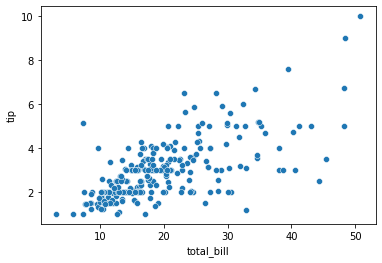

In [ ]:
scatter_tip = sns.scatterplot(x = 'total_bill', y = 'tip', data = dataset)

Note that seaborn already defined the axis labels. 

Also, we can see that, in general, as the total bill increases, the tip also increases. Thus, there is a **correlation** between these two variables.

In [ ]:
dataset[['total_bill', 'tip']].corr( )

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


We can see that, as correlation between these functions is positive and relatively high ($\rho$ = 0.67), as one increases, the other also **tends** to increase!

Now, let's try to answer another question: are tip values *proportional* to the total bill? Let's try to evaluate percentages!

In [ ]:
dataset['percent'] = (dataset['tip']/dataset['total_bill']*100).round(2)

dataset

,total_bill,tip,dessert,day,time,size,percent
0,16.99,1.01,No,Sun,Dinner,2,5.94
1,10.34,1.66,No,Sun,Dinner,3,16.05
2,21.01,3.50,No,Sun,Dinner,3,16.66
3,23.68,3.31,No,Sun,Dinner,2,13.98
4,24.59,3.61,No,Sun,Dinner,4,14.68
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,20.39
240,27.18,2.00,Yes,Sat,Dinner,2,7.36
241,22.67,2.00,Yes,Sat,Dinner,2,8.82
242,17.82,1.75,No,Sat,Dinner,2,9.82


Now, let's draw our scatter plot once again!

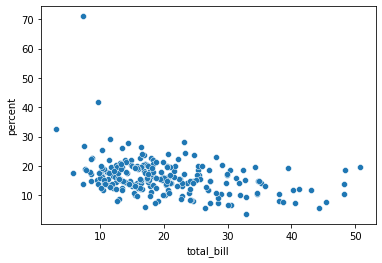

In [ ]:
scatter_tip_percent = sns.scatterplot(x = 'total_bill', y = 'percent', data = dataset)

It seems that, as the total_bill increases, the tip is **relatively** lower! We can also see this by the correlation coefficient, which is negative in this case ($\rho = -0.34$):

In [ ]:
dataset[['total_bill', 'percent']].corr( )

,total_bill,percent
total_bill,1.000000,-0.338629
percent,-0.338629,1.000000


Now, let's try another graph. Seaborn has some very interesting options for a statistics-focused visualization!

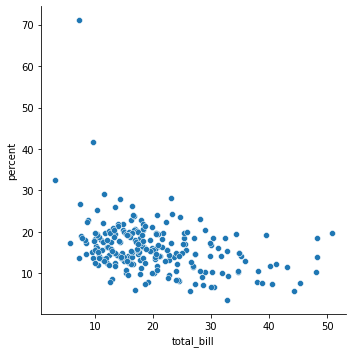

In [ ]:
rel_tip_percent = sns.relplot(x = 'total_bill', y = 'percent', data = dataset)

Here, the graph is very similar to a scatter plot. However, we can use *kind* option to change its appearance:

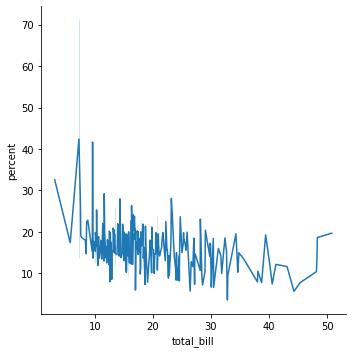

In [ ]:
rel_tip_percent = sns.relplot(x = 'total_bill', y = 'percent', data = dataset, kind = 'line')

Note that one of the points is very "see-through". That means that it is possibly and outlier from our dataset.

Another option is a lmplot, which helps to show how these two variables are related to!

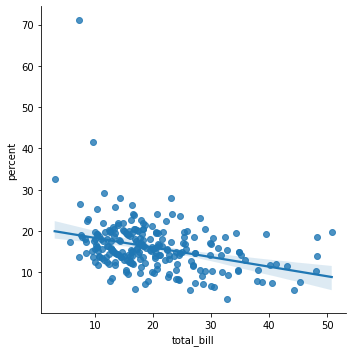

In [ ]:
lm_tip_percent = sns.lmplot(x = 'total_bill', y = 'percent', data = dataset)

## Trying to improve our graph

Now, let's try to change the visualization of our graph! We can add title, subtitle, and change axis labels:

In [ ]:
scatter_tip_percent.set_title('Analysis 01')                    # Title

scatter_tip_percent.figure.suptitle('Total bill x Tip')         # Subtitle

scatter_tip_percent.set(xlabel = 'Total bill', ylabel = 'Tip')  # Axis labels

[Text(17.200000000000003, 0.5, 'Tip'),
 Text(0.5, 18.106250000000003, 'Total bill')]

Now, to show our figure again:

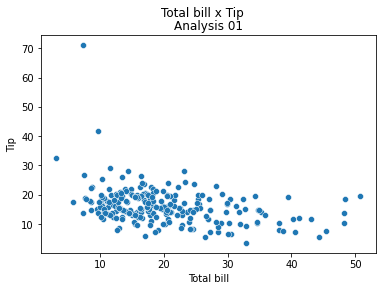

In [ ]:
scatter_tip_percent.get_figure( )

Finally, let's save our figure using *savefig( )*

In [ ]:
fig = scatter_tip_percent.get_figure( )

fig.savefig('analysis01.png')

# Analysis 02: Does asking for a dessert influences the tip value?

Now, we will try to understand if asking for a dessert influences in the tip value. First, let's try to understand how our data works, separating those who asked and those who did not asked for a dessert.

First, for those who asked for a dessert:

In [65]:
dataset[dataset['dessert'] == 'Yes'].describe( )

,total_bill,tip,size,percent
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,16.319140
std,9.832154,1.401468,0.810751,8.511748
min,3.070000,1.000000,1.000000,3.560000
25%,13.420000,2.000000,2.000000,10.680000
50%,17.920000,3.000000,2.000000,15.380000
75%,26.860000,3.680000,3.000000,19.510000
max,50.810000,10.000000,5.000000,71.030000


Now, for those who did not ask for a dessert:

In [68]:
dataset.query('dessert == "No"').describe( )

,total_bill,tip,size,percent
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,15.932318
std,8.255582,1.377190,1.017984,3.990701
min,7.250000,1.000000,1.000000,5.680000
25%,13.325000,2.000000,2.000000,13.690000
50%,17.590000,2.740000,2.000000,15.560000
75%,22.755000,3.505000,3.000000,18.500000
max,48.330000,9.000000,6.000000,29.200000


Note that, here, we used the *query( )* function (just to show that we can do the same thing in different ways).

Alternatively, we may group data based on the dessert column, and then describe these groups!

In [69]:
dataset_groupby_dessert = dataset.groupby('dessert')

In [72]:
dataset_groupby_dessert['total_bill'].describe( )

,count,mean,std,min,25%,50%,75%,max
dessert,,,,,,,,
No,151.0,19.188278,8.255582,7.25,13.325,17.59,22.755,48.33
Yes,93.0,20.756344,9.832154,3.07,13.420,17.92,26.860,50.81


In [71]:
dataset_groupby_dessert['tip'].describe( )

,count,mean,std,min,25%,50%,75%,max
dessert,,,,,,,,
No,151.0,2.991854,1.377190,1.0,2.0,2.74,3.505,9.0
Yes,93.0,3.008710,1.401468,1.0,2.0,3.00,3.680,10.0


Initially, it seems that asking for a dessert or not influences very little in the tip amount.

To visualize this data, we can also create some graphs. For instance, we can create a *catplot( )*

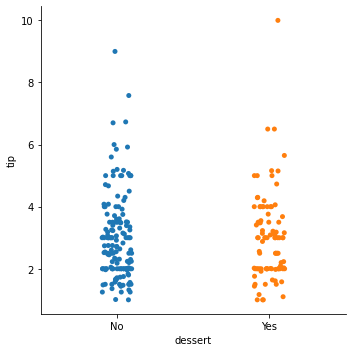

In [73]:
sns.catplot(x = 'dessert', y = 'tip', data = dataset)

The *catplot( )* shows all data on different columns, depending on if people asked for a dessert or not. 

Another way of showing these differences is by using a *relplot( )*, as in Analysis 01. However, this time, we will use a new parameter: *hue*

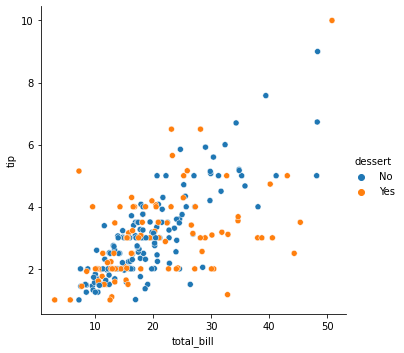

In [74]:
sns.relplot(x = 'total_bill', y = 'tip', data = dataset, hue = 'dessert')

Now, instead of a simple scatter plot, we can distinguish whether a given data point asked of a dessert or not. Here, we can note that it seems that, when one does not ask for a dessert, total_bill and tip seems to be more well correlated. 

To better look at this idea, we can use the *col( )* parameter.

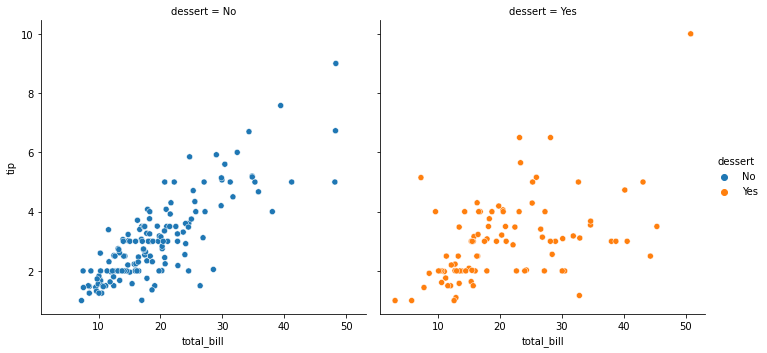

In [75]:
sns.relplot(x = 'total_bill', y = 'tip', data = dataset, hue = 'dessert', col = 'dessert')

See that data from the "No dessert" column seems to be better correlated. We can see this by the correlation factor:

In [77]:
ask_for_dessert_bool = dataset['dessert'] == 'Yes'

In [78]:
# Correlation between total_bill and tip (for those who asked for a dessert)

ask_for_dessert = dataset[ask_for_dessert_bool]

ask_for_dessert[['total_bill', 'tip']].corr( )

,total_bill,tip
total_bill,1.000000,0.488218
tip,0.488218,1.000000


In [79]:
# Correlation between total_bill and tip (for those who did not ask for a dessert)

not_ask_for_dessert = dataset[~ask_for_dessert_bool]

not_ask_for_dessert[['total_bill', 'tip']].corr( )

,total_bill,tip
total_bill,1.000000,0.822183
tip,0.822183,1.000000


See that, for those who did not ask for a dessert, $\rho = 0.82$, while for those who ask for a dessert, $\rho = 0.49$.

Let's now use a *lmplot( )* to see the same data.

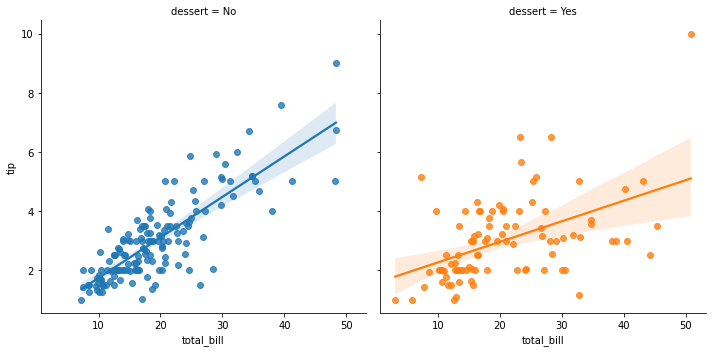

In [80]:
sns.lmplot(x = 'total_bill', y = 'tip', data = dataset, hue = 'dessert', col = 'dessert')

Now, drawing a similar graph, but now for the percentages:

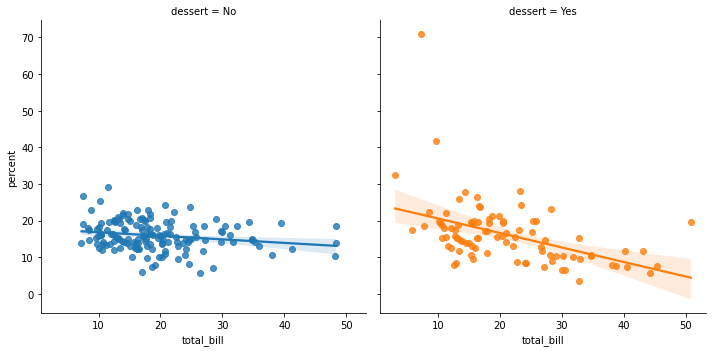

In [81]:
sns.lmplot(x = 'total_bill', y = 'percent', data = dataset, hue = 'dessert', col = 'dessert')

Using *lmplot( )*, we can see a linear regression for our data, as well as its uncertainty. Note that, on the left side, as correlation between variables is very high, uncertainty is also very low. However, the opposite occurs in the right side. 

It seems that, if one asks for a dessert, there are other variables that also influence the tip amount (which are not being accounted for!).

Now, finishing with a histogram:

## Hypothesis test

To understand if our data is enough to determine if asking for a dessert influences in the tip amount, we can make a hypothesis test:

$H^{null}:$ Distribution for the tip percentage is the same in the two groups.

$H^{alt}:$ Distribution for the tip percentage is **not** the same in the two groups.

To that end, we will import *ranksums* from *scipy.stats*

In [82]:
from scipy.stats import ranksums

We have already defined two different datasets: one containing those who asked for a dessert, and other containing those who did not ask for a dessert.

In [83]:
ask_for_dessert.head(10)

,total_bill,tip,dessert,day,time,size,percent
56,38.01,3.00,Yes,Sat,Dinner,4,7.89
58,11.24,1.76,Yes,Sat,Dinner,2,15.66
60,20.29,3.21,Yes,Sat,Dinner,2,15.82
61,13.81,2.00,Yes,Sat,Dinner,2,14.48
62,11.02,1.98,Yes,Sat,Dinner,2,17.97
63,18.29,3.76,Yes,Sat,Dinner,4,20.56
67,3.07,1.00,Yes,Sat,Dinner,1,32.57
69,15.01,2.09,Yes,Sat,Dinner,2,13.92
72,26.86,3.14,Yes,Sat,Dinner,2,11.69
73,25.28,5.00,Yes,Sat,Dinner,2,19.78


In [84]:
not_ask_for_dessert.head(10)

,total_bill,tip,dessert,day,time,size,percent
0,16.99,1.01,No,Sun,Dinner,2,5.94
1,10.34,1.66,No,Sun,Dinner,3,16.05
2,21.01,3.50,No,Sun,Dinner,3,16.66
3,23.68,3.31,No,Sun,Dinner,2,13.98
4,24.59,3.61,No,Sun,Dinner,4,14.68
5,25.29,4.71,No,Sun,Dinner,4,18.62
6,8.77,2.00,No,Sun,Dinner,2,22.81
7,26.88,3.12,No,Sun,Dinner,4,11.61
8,15.04,1.96,No,Sun,Dinner,2,13.03
9,14.78,3.23,No,Sun,Dinner,2,21.85


Now, we can get the *pvalue* using the *ranksums( )* function:

In [86]:
ranksums(ask_for_dessert['percent'], not_ask_for_dessert['percent'])

RanksumsResult(statistic=-0.5845504113520769, pvalue=0.558850059321255)

Note that our *pvalue = 0.56*. That means that the difference between our data is not significant ($p > 0.05$). Thus, we put away our alternative hypothesis, since we **can not say that**:

$H^{alt}:$ Distribution for the tip percentage is **not** the same in the two groups.



To finish this analysis, let's see a histogram for each case:

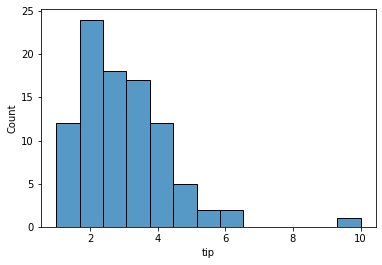

In [94]:
# Histogram for cases where 'dessert' == 'Yes'

sns.histplot(x = 'tip', data = ask_for_dessert)

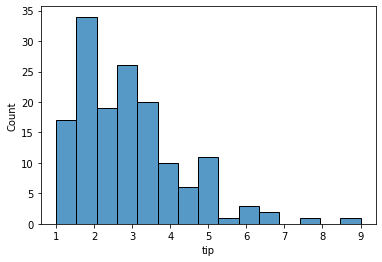

In [95]:
# Histogram for cases where 'dessert' == 'No'

sns.histplot(x = 'tip', data = not_ask_for_dessert)

# Analysis 03: Does the day of the week influences in the tip value?

This time, instead of being worried about if one asked or not for a dessert, we can make analyses based on the day of the week. Thus, these analysis are very similar from before. However, this time, we have four possible days of the week:

In [96]:
dataset.head(10)

,total_bill,tip,dessert,day,time,size,percent
0,16.99,1.01,No,Sun,Dinner,2,5.94
1,10.34,1.66,No,Sun,Dinner,3,16.05
2,21.01,3.50,No,Sun,Dinner,3,16.66
3,23.68,3.31,No,Sun,Dinner,2,13.98
4,24.59,3.61,No,Sun,Dinner,4,14.68
5,25.29,4.71,No,Sun,Dinner,4,18.62
6,8.77,2.00,No,Sun,Dinner,2,22.81
7,26.88,3.12,No,Sun,Dinner,4,11.61
8,15.04,1.96,No,Sun,Dinner,2,13.03
9,14.78,3.23,No,Sun,Dinner,2,21.85


In [97]:
dataset.day.unique( )

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)



*   Sun  - Sunday
*   Sat  - Saturday
*   Thur - Thursday
*   Fri  - Friday



Thus, let's make a *catplot( )*, now for the day of the week. First, let's see how those are related to the total bill value.

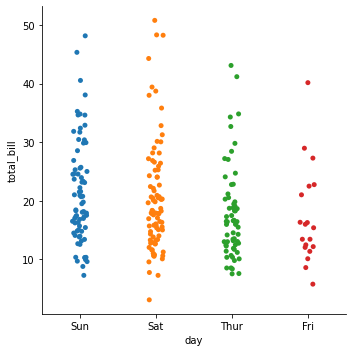

In [100]:
sns.catplot(x = 'day', y = 'total_bill', data = dataset)

It seems that, on sunday and saturday, total bill value is higher.

Alternatively, we can also draw similar conclusions from a boxplot.

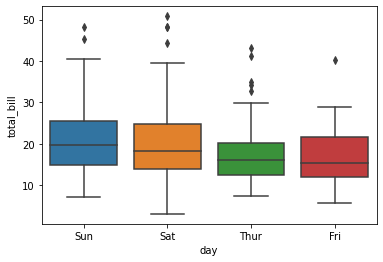

In [113]:
sns.boxplot(x = 'day', y = 'total_bill', data = dataset)

Now let's see a *relplot( )* for the same data. This time, we will try to related 'total_bill' and 'tip'.

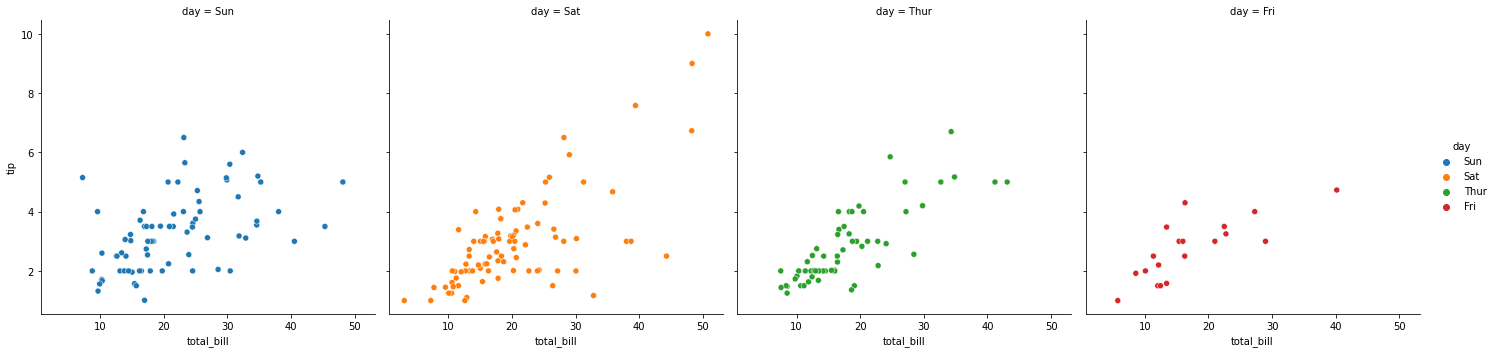

In [102]:
sns.relplot(x = 'total_bill', y = 'tip', data = dataset, hue = 'day', col = 'day')

Let's make a similar plot, now for the tip percentages.

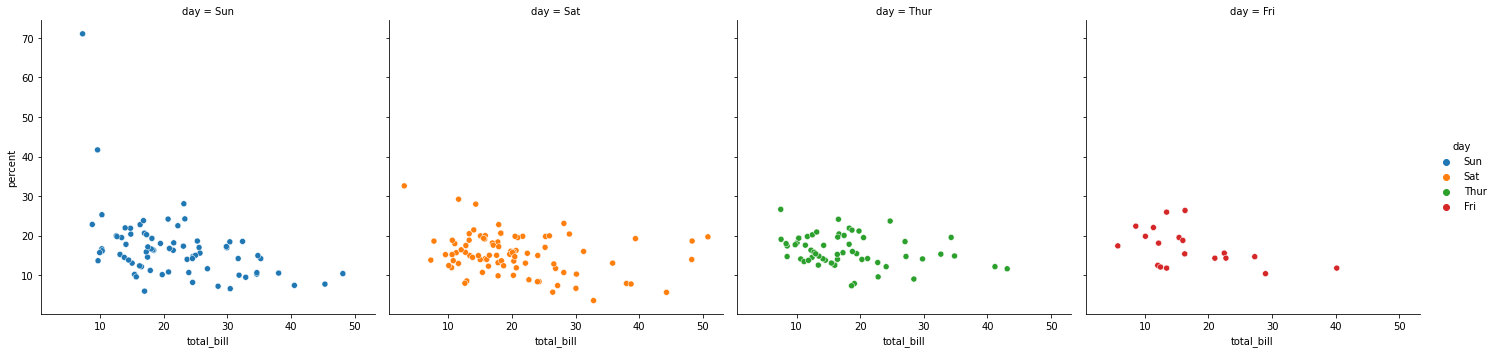

In [103]:
sns.relplot(x = 'total_bill', y = 'percent', data = dataset, hue = 'day', col = 'day')

Let's draw a line using *lmplot( )*.

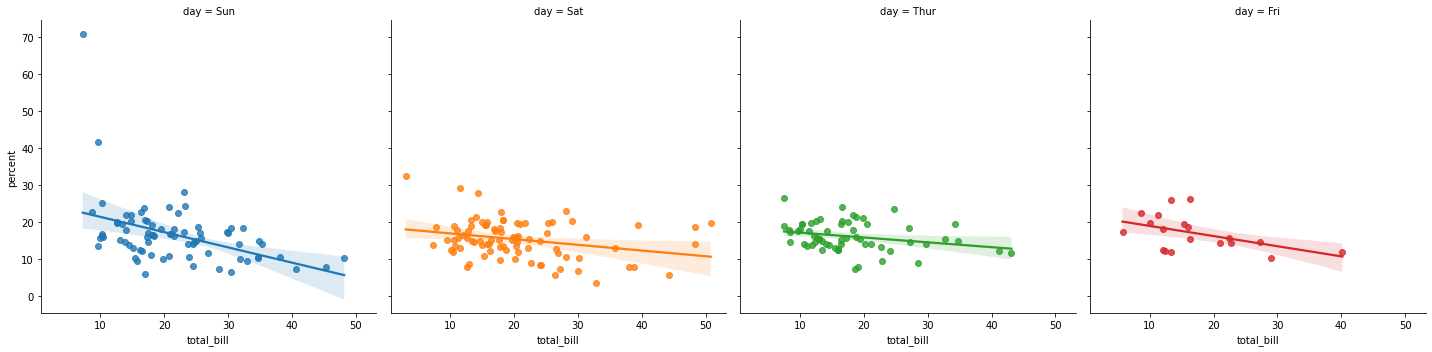

In [104]:
sns.lmplot(x = 'total_bill', y = 'percent', data = dataset, hue = 'day', col = 'day')

## Descriptive analysis

Similar to how we did previously for the dessert, we can do a descriptive analysis. First, for all data:

In [105]:
dataset.describe( )

,total_bill,tip,size,percent
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.079754
std,8.902412,1.383638,0.951100,6.107020
min,3.070000,1.000000,1.000000,3.560000
25%,13.347500,2.000000,2.000000,12.910000
50%,17.795000,2.900000,2.000000,15.475000
75%,24.127500,3.562500,3.000000,19.147500
max,50.810000,10.000000,6.000000,71.030000


Now, let's use *groupby( )* to get descriptive statistics based on the day of the week

In [106]:
dataset_groupby_day = dataset.groupby('day')

In [109]:
dataset_groupby_day.describe( )

total_bill                                                             \
          count       mean       std   min      25%    50%      75%    max   
day                                                                          
Fri        19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17   
Sat        87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81   
Sun        76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17   
Thur       62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11   

       tip            ... size      percent                              \
     count      mean  ...  75%  max   count       mean       std    min   
day                   ...                                                 
Fri   19.0  2.734737  ...  2.0  4.0    19.0  16.991579  4.766803  10.36   
Sat   87.0  2.993103  ...  3.0  5.0    87.0  15.314598  5.129187   3.56   
Sun   76.0  3.255132  ...  4.0  6.0    76.0  16.689605  8.473462   5.94   
Thur  62.0  2.771452  ...  2.0  6.0    62.0  16.126452  3.864958   7.30   

                                      
          25%    50%      75%    max  
day                                   
Fri   13.3750  15.56  19.6650  26.35  
Sat   12.3850  15.18  18.8250  32.57  
Sun   12.0000  16.11  18.7850  71.03  
Thur  13.8175  15.38  19.2675  26.63  

[4 rows x 32 columns]

Let's see the mean value for all numeric columns.

In [108]:
dataset_groupby_day.mean( )

,total_bill,tip,size,percent
day,,,,
Fri,17.151579,2.734737,2.105263,16.991579
Sat,20.441379,2.993103,2.517241,15.314598
Sun,21.410000,3.255132,2.842105,16.689605
Thur,17.682742,2.771452,2.451613,16.126452


We can see that, in general, people tend to spend more on Saturday and Sunday. Also, the tip is higher in these days. However, at the same time, the **average tip percentage** is not higher in these days!

However, does the difference between average responses of our sampled data means that tip amounts are really different for different days of the week? We can try to understand this by a hypothesis test.

## Hypothesis test

We can see that the average tip on sunday (3.26) is higher than the average tip on saturday (2.99). Now, is this difference relevant? Statistically, does this mean that, on Sundays, tip amounts are really higher? 

Let's make a Hypothesis test.

$H^{null}:$ Distribution for the total bill value is the same in the two groups.

$H^{alt}:$ Distribution for the total bill value is **not** the same in the two groups.

In [116]:
total_bill_saturday = dataset.query('day == "Sat"')['total_bill'].to_frame( )
total_bill_saturday.head(5)

,total_bill
19,20.65
20,17.92
21,20.29
22,15.77
23,39.42


In [119]:
total_bill_sunday = dataset[dataset['day'] == 'Sun']['total_bill'].to_frame( )
total_bill_sunday.head(5)

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59


Again, let's use *ranksums( )*

In [120]:
ranksums(total_bill_saturday, total_bill_sunday)

RanksumsResult(statistic=-0.9198084864360142, pvalue=0.3576728477868443)

Again, since *pvalue* is higher than 0.05, we **reject** the alternative hypothesis. Thus, we can not say that distributions for the saturday and for the sunday are different.

# Analysis 04: Does the time of the day influences in the tip value?

Now, let's start our final analysis. This time, regarding the time of the day. 

In [121]:
dataset.head(5)

,total_bill,tip,dessert,day,time,size,percent
0,16.99,1.01,No,Sun,Dinner,2,5.94
1,10.34,1.66,No,Sun,Dinner,3,16.05
2,21.01,3.50,No,Sun,Dinner,3,16.66
3,23.68,3.31,No,Sun,Dinner,2,13.98
4,24.59,3.61,No,Sun,Dinner,4,14.68


First, let's see what are the possible values for this column.

In [122]:
dataset['time'].unique( )

array(['Dinner', 'Lunch'], dtype=object)

Thus, we have entries for either 'Lunch' or 'Dinner'. 

Let's draw some of the graphs we have already drawn in the previous analyzes.

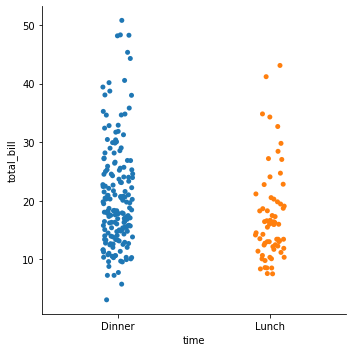

In [124]:
sns.catplot(x = 'time', y = 'total_bill', data = dataset)

It seems that, on the Dinner, the total bill value is higher than on the Lunch. To make it easier to see how many points are in some $y_values$, we can use *kind = 'swarm'*

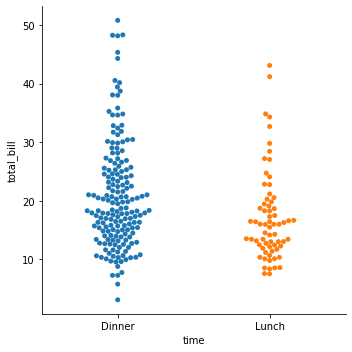

In [125]:
sns.catplot(x = 'time', y = 'total_bill', data = dataset, kind = 'swarm')

Another interesting graph that we can draw is the violin plot:

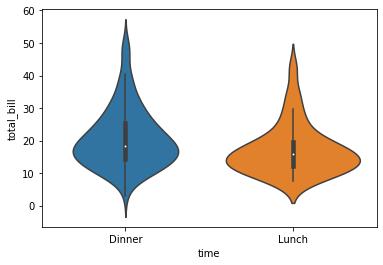

In [126]:
sns.violinplot(x = 'time', y = 'total_bill', data = dataset)

The boxplot is also very similar to the violin, but helps us to see the mean values and the quartiles:

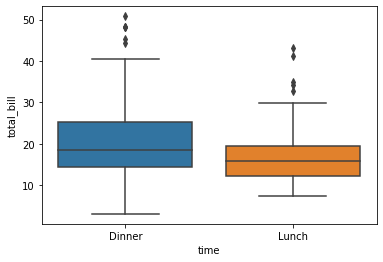

In [127]:
sns.boxplot(x = 'time', y = 'total_bill', data = dataset)

Another very traditional graph for these analyses is the *distplot( )*, which is similar to a histogram. First, let's make auxiliary datasets

In [128]:
lunch = dataset.query('time == "Lunch"')
lunch.head(5)

,total_bill,tip,dessert,day,time,size,percent
77,27.20,4.00,No,Thur,Lunch,4,14.71
78,22.76,3.00,No,Thur,Lunch,2,13.18
79,17.29,2.71,No,Thur,Lunch,2,15.67
80,19.44,3.00,Yes,Thur,Lunch,2,15.43
81,16.66,3.40,No,Thur,Lunch,2,20.41


In [129]:
dinner = dataset.query('time == "Dinner"')
dinner.head(5)

,total_bill,tip,dessert,day,time,size,percent
0,16.99,1.01,No,Sun,Dinner,2,5.94
1,10.34,1.66,No,Sun,Dinner,3,16.05
2,21.01,3.50,No,Sun,Dinner,3,16.66
3,23.68,3.31,No,Sun,Dinner,2,13.98
4,24.59,3.61,No,Sun,Dinner,4,14.68


Now, making our *distplot( )*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


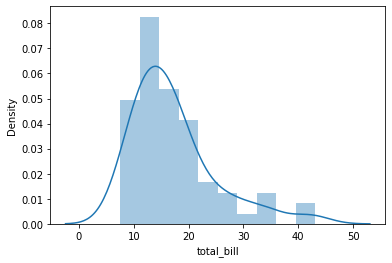

In [130]:
sns.distplot(lunch['total_bill'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


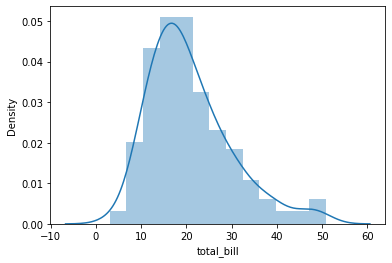

In [131]:
sns.distplot(dinner['total_bill'])

## Hypothesis test

Before doing the hypothesis test, we can evaluate some descriptive statistics. Thus, using *groupby( )* once again:

In [133]:
dataset_groupby_time = dataset.groupby('time')

In [138]:
dataset_groupby_time.mean( )[['total_bill', 'tip', 'percent']]

,total_bill,tip,percent
time,,,
Dinner,20.797159,3.102670,15.951477
Lunch,17.168676,2.728088,16.411765


Note that, here, we can see a clear difference in the total bill value: at dinner, total bill is significantly higher than at lunch. So does the mean tip value. 

Finally, let's finish with one more hypothesis test. Again, let's define our null and alternative hypothesis:

$H^{null}:$ Distribution for the total bill value is the same in the two groups.

$H^{alt}:$ Distribution for the total bill value is **not** the same in the two groups.

Once again, using the *ranksums( )* function:


In [132]:
ranksums(lunch['total_bill'], dinner['total_bill'])

RanksumsResult(statistic=-3.2438872807262955, pvalue=0.0011791039723641672)

Note that, this time, our p-value is lower than 0.05. This means that we can reject our null hypothesis, which means that distribution for the total bill value **is different** for the lunch and for the dinner!

In [139]:
%reset-f

## Analyzing a larger dataset

When analyzing larger datasets, we can perform more accurate inferences. For instance, let's make Analysis 01 again, but now using a larger dataset.

In [143]:
import pandas as pd
import seaborn as sns

dataset = pd.read_csv('tips_atualizado.csv')
dataset.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  3416 non-null   float64
 1   tip         3416 non-null   float64
 2   dessert     3416 non-null   object 
 3   day         3416 non-null   object 
 4   time        3416 non-null   object 
 5   size        3416 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 160.2+ KB


In [144]:
dataset.head(5)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


This new dataset has 3416 entries and, again, no null entry.

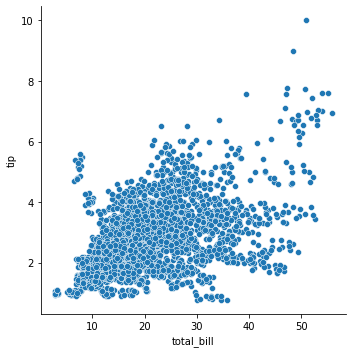

In [146]:
sns.relplot(x = 'total_bill', y = 'tip', data = dataset)

Let's evaluate the correlation between those two variables

In [147]:
dataset[['total_bill', 'tip']].corr( )

,total_bill,tip
total_bill,1.000000,0.493706
tip,0.493706,1.000000


Note that, this time, correlation between variables is different. This is due to the difference in the datasets. Since this is a larger dataset, we can assume that it is more reliable.

Finally, drawing a *lmplot( )*

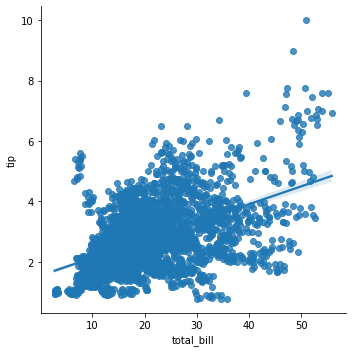

In [148]:
sns.lmplot(x = 'total_bill', y = 'tip', data = dataset)